# Sample Distribution vs. Sampling Distribution

## Objetivo
Demonstrar a diferença entre:
- **Sample Distribution:** Distribuição de uma única amostra.
- **Sampling Distribution:** Distribuição das médias de múltiplas amostras.

## Método
1. **Gerar População Artificial**:
   - Distribuição Gaussiana: `μ = 50`, `σ = 10`.
   - Tamanho da população: `N = 10.000`.
   ```python
2. **Extrair Amostras**:
   - Tamanho da amostra (n) = 100.
   - Número de amostras (k) = 1 para Sample Distribution e 1000 para Sampling Distribution.
3. **Avaliar Probabilidades**:
   - Probabilidade de um valor estar acima de 70 na população.
   - Probabilidade de uma média amostral estar acima de 55 na sampling distribution.

## Importação das Bibliotecas do Projeto

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, norm

## Parte A: Distribuição Amostral e Distribuição de Amostragem em uma População Gaussiana Artificial

### 1. Criar População

In [3]:
np.random.seed(42)  # Para reprodutibilidade
mu, sigma = 50, 10
N = 10000
populacao = np.random.normal(mu, sigma, N)

### 2. Sample Distribution (uma amostra)

In [4]:
n = 100
amostra = np.random.choice(populacao, n)

### 3. Sampling Distribution (médias de várias amostras)

In [5]:
k = 1000
medias_amostrais = []

for _ in range(k):
    sample = np.random.choice(populacao, n)
    medias_amostrais.append(np.mean(sample))

medias_amostrais = np.array(medias_amostrais)

### 4. Plotar os gráficos

#### População

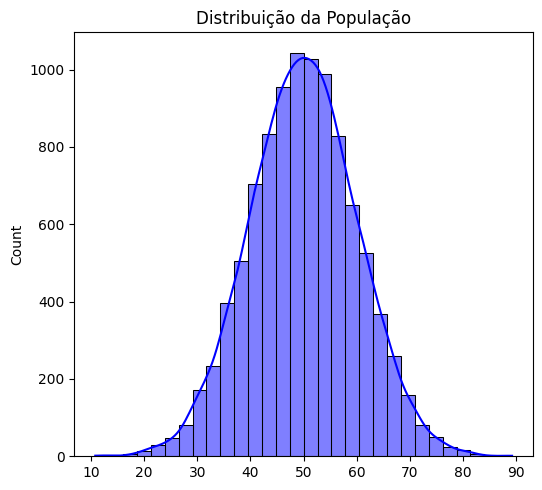

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
sns.histplot(populacao, kde=True, color='blue', bins=30)
plt.title('Distribuição da População')

plt.tight_layout()
plt.show()

#### Sample Distribution

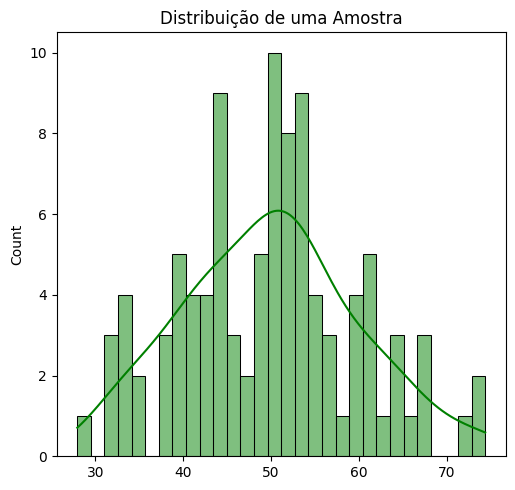

In [7]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 2)
sns.histplot(amostra, kde=True, color='green', bins=30)
plt.title('Distribuição de uma Amostra')

plt.tight_layout()
plt.show()

### Sampling Distribution

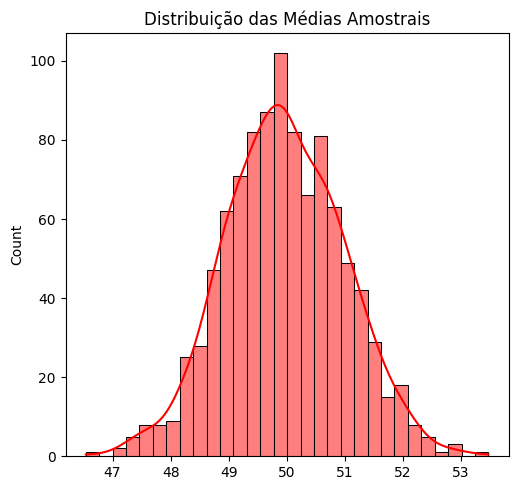

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 3)
sns.histplot(medias_amostrais, kde=True, color='red', bins=30)
plt.title('Distribuição das Médias Amostrais')

plt.tight_layout()
plt.show()

### 5. Avaliações de Probabilidade

#### Probabilidade de um valor > 70 na população

In [9]:

prob_pop = 1 - norm.cdf(70, mu, sigma)
print(f"Probabilidade de um valor > 70 na população: {prob_pop:.4f} ({prob_pop*100:.2f}%)")

Probabilidade de um valor > 70 na população: 0.0228 (2.28%)


#### Probabilidade de uma média amostral > 55

In [ ]:
sigma_amostral = sigma / np.sqrt(n)
prob_media = 1 - norm.cdf(55, mu, sigma_amostral)
print(f"Probabilidade de uma média amostral > 55: {prob_media:.4f} ({prob_media*100:.2f}%)")

Probabilidade de uma média amostral > 55: 0.0000 (0.00%)


## Parte B: Aplicando o Teorema do Limite Central (TLC) à distribuição Gama

#### Parâmetros da Simulação

In [11]:
# Parâmetros da distribuição Gama
shape, scale = 2, 2  # k=2, θ=2

# Tamanhos de amostra a serem testados
tamanhos_amostra = [10, 30, 50, 100]

# Número de amostras para cada tamanho
num_amostras = 1000

# Cálculo da média e variância teórica
mu = shape * scale
var_teorica = shape * scale**2

#### Função para Gerar e Plotar 

In [12]:
def plot_tlc_gamma(n):
    """Gera e plota a distribuição de médias para um tamanho de amostra n"""
    medias = []
    for _ in range(num_amostras):
        amostra = gamma.rvs(shape, scale=scale, size=n)
        medias.append(np.mean(amostra))
    
    plt.figure(figsize=(8, 5))
    sns.histplot(medias, kde=True, stat='density', color='skyblue')
    
    sigma = np.sqrt(var_teorica) / np.sqrt(n)
    x = np.linspace(min(medias), max(medias), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)
    
    plt.title(f'Tamanho da amostra n = {n}\nμ = {mu:.2f}, σ = {sigma:.2f}')
    plt.xlabel('Médias amostrais')
    plt.ylabel('Densidade')
    plt.show()

#### Execução e Visualização

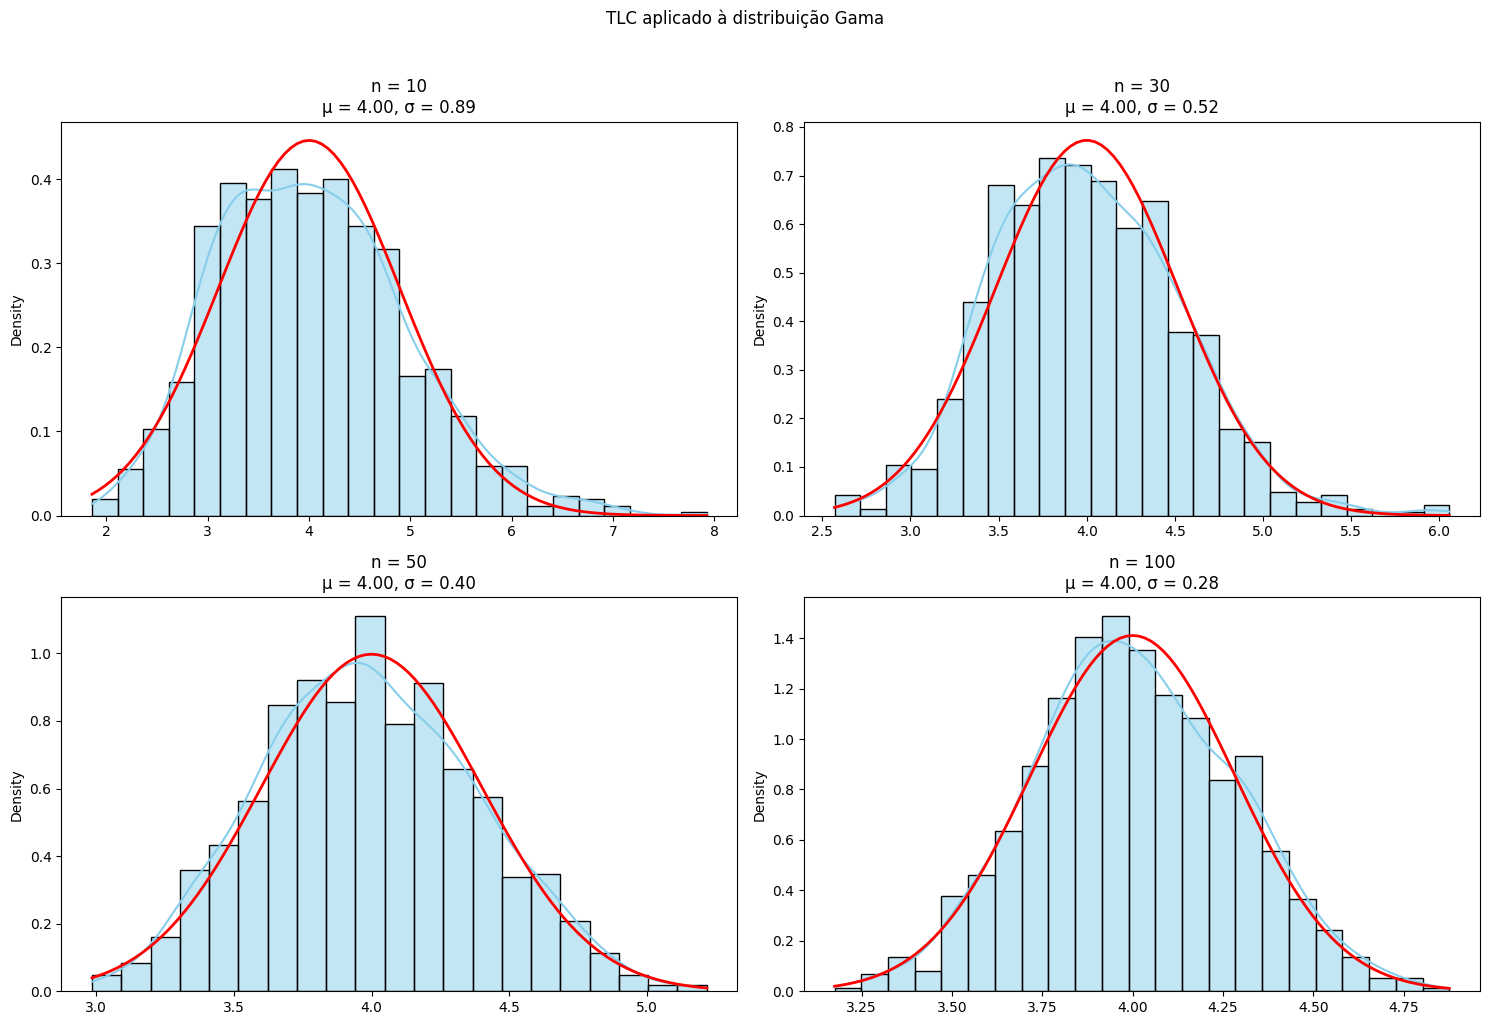

In [16]:
# Cria figura principal
plt.figure(figsize=(15, 10))

for i, n in enumerate(tamanhos_amostra, 1):
    medias = [np.mean(gamma.rvs(shape, scale=scale, size=n)) for _ in range(num_amostras)]
    
    plt.subplot(2, 2, i)
    sns.histplot(medias, kde=True, stat='density', color='skyblue')
    
    sigma = np.sqrt(var_teorica) / np.sqrt(n)
    x = np.linspace(min(medias), max(medias), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r-', linewidth=2)
    
    plt.title(f'n = {n}\nμ = {mu:.2f}, σ = {sigma:.2f}')

plt.suptitle('TLC aplicado à distribuição Gama', y=1.02)
plt.tight_layout()
plt.show()

#### Para analisar um tamanho 30 com mais detalhes

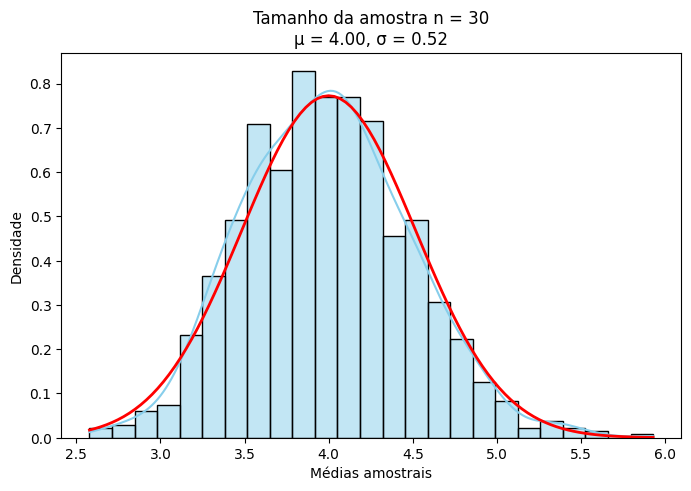

In [17]:
# Para analisar um tamanho específico com mais detalhes
plot_tlc_gamma(30)  # Exemplo para n=30

### Parte C: Cálculo do p-value com Visualização Passo a Passo

#### Parâmetros da distribuição (H₀: N(0,1))

In [9]:
two_tailed = False  # Altere para True se quiser teste bicaudal
mu, sigma = 0, 1  
valor = 2.1  # Exemplo: valor a ser testado
np.random.seed(42)  # Reprodutibilidade

#### Passo 1: Plotar distribuição H₀ e valor observado

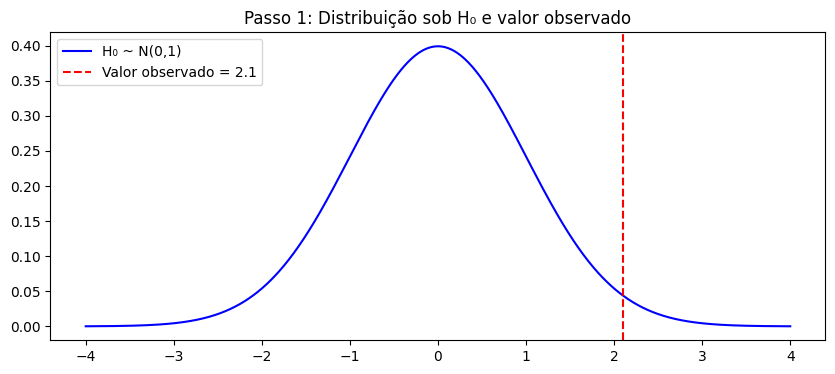

In [10]:
plt.figure(figsize=(10, 4))
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'b-', label=f'H₀ ~ N({mu},{sigma**2})')
plt.axvline(valor, color='r', linestyle='--', label=f'Valor observado = {valor}')
plt.title('Passo 1: Distribuição sob H₀ e valor observado')
plt.legend()
plt.show()

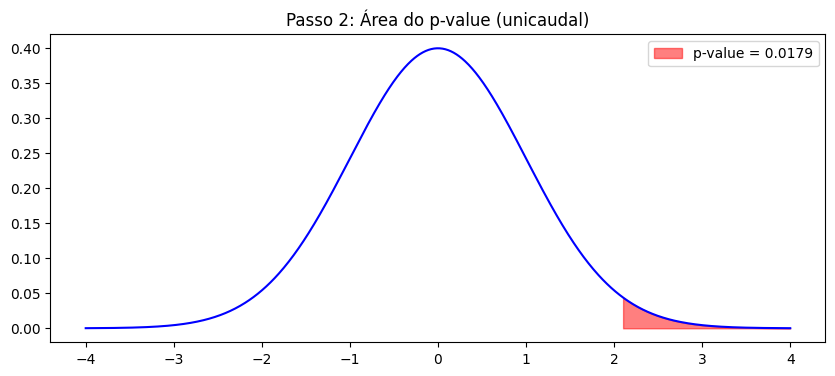

In [11]:
# Passo 2: Calcular p-value e área crítica
p_value = 1 - norm.cdf(valor, mu, sigma) if not two_tailed else 2 * (1 - norm.cdf(abs(valor), mu, sigma))
    
plt.figure(figsize=(10, 4))
plt.plot(x, y, 'b-')
if two_tailed:
    plt.fill_between(x[x <= -valor], y[x <= -valor], color='red', alpha=0.5, label=f'p-value = {p_value:.4f}')
    plt.fill_between(x[x >= valor], y[x >= valor], color='red', alpha=0.5)
else:
    plt.fill_between(x[x >= valor], y[x >= valor], color='red', alpha=0.5, label=f'p-value = {p_value:.4f}')
    
plt.title(f'Passo 2: Área do p-value ({"bicaudal" if two_tailed else "unicaudal"})')
plt.legend()
plt.show()

#### Passo 3: Interpretação

In [12]:
print(f"\nResultado:")
print(f"- p-value = {p_value:.4f}")
print(f"- {'Rejeita H₀' if p_value < 0.05 else 'Não rejeita H₀'} (α = 0.05)")


Resultado:
- p-value = 0.0179
- Rejeita H₀ (α = 0.05)


### Parte D: Simulação de Taxa de Falsos Negativos em Teste de Hipóteses

Objetivo:
- Calcular a probabilidade de não rejeitar a hipótese nula (H₀) quando ela é falsa (Erro Tipo II), utilizando:

    - Distribuição Vermelha (H₀): Referência para cálculo do p-value.

    - Distribuição Azul (H₁): Fonte dos dados simulados (situação real).

### Estudo do Erro Tipo II com Amostras Pequenas

#### Parâmetros das distribuições

In [17]:
mu_H0, mu_H1 = 0, 1  # Médias (H₀: distribuição vermelha, H₁: azul)
sigma = 1             # Mesmo desvio padrão
num_sequencias = 100  # Número de sequências simuladas
tamanho_sequencia = 3 # Tamanho de cada sequência (n=3)

#### Visualização das Distribuições

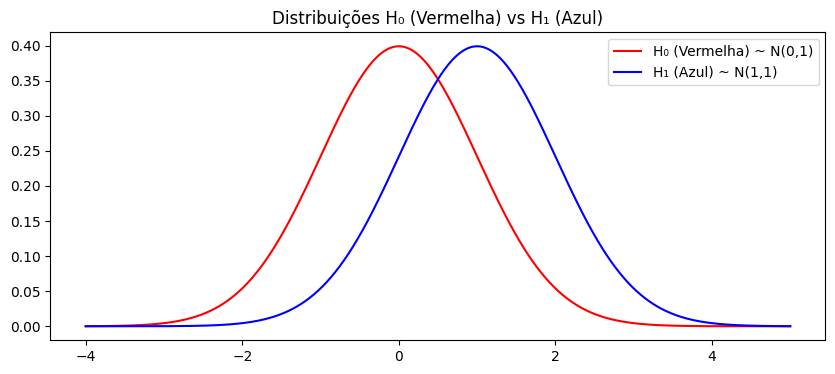

In [ ]:
plt.figure(figsize=(10, 4))
x = np.linspace(-4, 5, 1000)
y_H0 = norm.pdf(x, mu_H0, sigma)
y_H1 = norm.pdf(x, mu_H1, sigma)


plt.plot(x, y_H0, 'r-', label='H₀ (Vermelha) ~ N(0,1)')
plt.plot(x, y_H1, 'b-', label='H₁ (Azul) ~ N(1,1)')
plt.title('Distribuições H₀ (Vermelha) vs H₁ (Azul)')
plt.legend()
plt.show()

### Simulação e Cálculo do Poder Estatístico

In [19]:
# Simulação de falsos negativos
falsos_negativos = 0
p_values = []

for _ in range(num_sequencias):
    # Gera amostra da distribuição AZUL (H₁)
    amostra = np.random.normal(mu_H1, sigma, tamanho_sequencia)
    
    # Calcula p-value baseado na distribuição VERMELHA (H₀)
    z_score = (np.mean(amostra) - mu_H0) / (sigma / np.sqrt(tamanho_sequencia))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))  # Teste bicaudal
    p_values.append(p_value)
    
    # Verifica falso negativo (p-value > 0.05)
    if p_value > 0.05:
        falsos_negativos += 1

taxa_fn = falsos_negativos / num_sequencias
poder_teste = 1 - taxa_fn  # Poder estatístico


In [20]:
# Célula 4: Resultados
print(f"Resultados para n = {tamanho_sequencia}:")
print(f"- Taxa de falsos negativos: {taxa_fn:.2%}")
print(f"- Poder do teste (1 - β): {poder_teste:.2%}")

Resultados para n = 3:
- Taxa de falsos negativos: 67.00%
- Poder do teste (1 - β): 33.00%


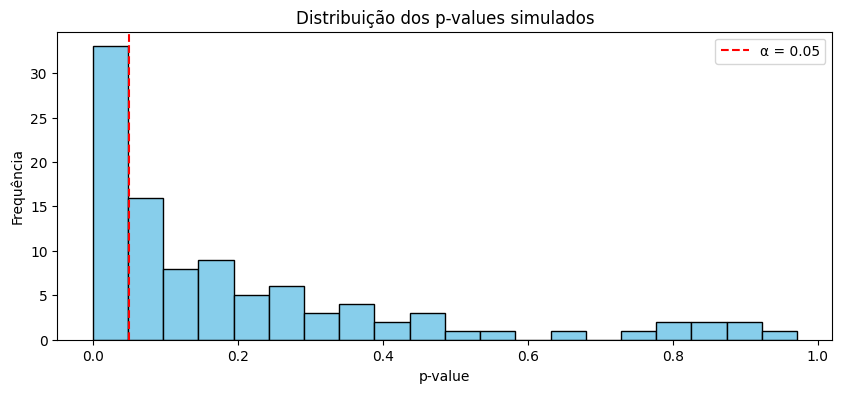

In [21]:

# Histograma dos p-values
plt.figure(figsize=(10, 4))
plt.hist(p_values, bins=20, color='skyblue', edgecolor='black')
plt.axvline(0.05, color='red', linestyle='--', label='α = 0.05')
plt.title('Distribuição dos p-values simulados')
plt.xlabel('p-value')
plt.ylabel('Frequência')
plt.legend()
plt.show()

In [2]:
import numpy as np
from scipy.stats import ttest_1samp  # Teste t para uma amostra

# Dados de exemplo: amostra de pesos (em kg)
pesos_amostra = [68, 72, 65, 70, 75, 78, 74, 69, 72, 71]

# Média populacional hipotética
media_populacional = 74.2

# Realiza o teste t para uma amostra
estatistica_t, valor_p = ttest_1samp(pesos_amostra, media_populacional)

# Resultados
print(f"Média da Amostra: {np.mean(pesos_amostra):.2f}")
print(f"Estatística t: {estatistica_t:.2f}")
print(f"Valor-p: {valor_p:.4f}")

# Interpretação dos resultados
nivel_significancia = 0.05  # Nível de significância
if valor_p < nivel_significancia:
    print("Rejeitar a hipótese nula: A média da amostra é significativamente diferente da média populacional.")
else:
    print("Falha em rejeitar a hipótese nula: A média da amostra não é significativamente diferente da média populacional.")

Média da Amostra: 71.40
Estatística t: -2.38
Valor-p: 0.0411
Rejeitar a hipótese nula: A média da amostra é significativamente diferente da média populacional.
